In [1]:
# Importing things 
import numpy as np
import pandas as pd 
import seaborn as sns

import matplotlib.pyplot as plt

import matplotlib.patches as mpatches

import matplotlib.ticker as mticker
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from matplotlib.ticker import ScalarFormatter

import matplotlib.colors as colors
from matplotlib.colors import ListedColormap
from matplotlib.colors import LogNorm
from matplotlib.colors import Normalize

from scipy.ndimage import gaussian_filter

from matplotlib.gridspec import GridSpec

## Plotting preferences

In [2]:
# Font sizes
axis_label_font = 30
axis_numbers_font = 25
title_font = 50
legend_font = 50

path = '/Users/audreyburggraf/Desktop/THESIS/Figures/'

In [3]:
detection_colours = sns.color_palette("hls", 4)
detection_colours

[(0.86, 0.3712, 0.33999999999999997),
 (0.5688000000000001, 0.86, 0.33999999999999997),
 (0.33999999999999997, 0.8287999999999999, 0.86),
 (0.6311999999999998, 0.33999999999999997, 0.86)]

In [4]:
dark_colours = sns.color_palette("viridis", 8)
dark_colours

[(0.281412, 0.155834, 0.469201),
 (0.244972, 0.287675, 0.53726),
 (0.190631, 0.407061, 0.556089),
 (0.147607, 0.511733, 0.557049),
 (0.119699, 0.61849, 0.536347),
 (0.20803, 0.718701, 0.472873),
 (0.430983, 0.808473, 0.346476),
 (0.709898, 0.868751, 0.169257)]

In [5]:
my_colours = sns.color_palette("husl", 8)
my_colours

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.8087954113106306, 0.5634700050056693, 0.19502642696727285),
 (0.5920891529639701, 0.6418467016378244, 0.1935069134991043),
 (0.19783576093349015, 0.6955516966063037, 0.3995301037444499),
 (0.21044753832183283, 0.6773105080456748, 0.6433941168468681),
 (0.22335772267769388, 0.6565792317435265, 0.8171355503265633),
 (0.6423044349219739, 0.5497680051256467, 0.9582651433656727),
 (0.9603888539940703, 0.3814317878772117, 0.8683117650835491)]

In [6]:
cmap_reds = ListedColormap(plt.cm.get_cmap('Reds', 10)(np.arange(10)))
cmap_greens = ListedColormap(plt.cm.get_cmap('Greens', 10)(np.arange(10)))
cmap_purples = ListedColormap(plt.cm.get_cmap('Purples', 10)(np.arange(10)))

In [7]:
alpha = 0.7

## Data Frames

In [8]:
# Importing data file 
df = pd.read_csv('/Users/audreyburggraf/Desktop/THESIS/Data Files/bigrun_10000_after_changes.csv')
df

,Inj.0P alpha0,Inj.0P delta0,Inj.0P pmra,Inj.0P pmdec,Inj.0P prlx,Inj.1P alpha0,Inj.1P delta0,Inj.1P pmra,Inj.1P pmdec,Inj.1P prlx,...,Condition 4,Detection,Astrometric Signature,Stellar Mass,Scaling Factor,Distance,Semi-Major Axis,Sigma fov,Noise,S/N
0,288.503923,-68.088209,-44.551743,-37.022875,10.061523,288.503923,-68.088209,-44.551743,-37.022875,10.061523,...,0,0,56.262094,0.154116,1.272583,99.388534,1.136793,333.149854,471.145042,0.151966
1,138.039973,-3.377097,-163.019718,-32.490641,11.956663,138.039973,-3.377097,-163.019718,-32.490641,11.956663,...,0,0,1.022224,0.302706,10.244061,83.635376,0.088245,96.705137,136.761717,0.076569
2,286.695890,-0.244781,-3.752077,-4.259140,10.096390,286.695890,-0.244781,-3.752077,-4.259140,10.096390,...,0,0,18.653842,0.078149,21.004269,99.045303,0.021571,427.687033,604.840802,0.647791
3,115.135052,0.740534,26.853094,-84.685793,10.182806,115.135052,0.740534,26.853094,-84.685793,10.182806,...,0,0,36.973503,0.386243,3.250046,98.204759,0.442331,91.103628,128.839986,0.932673
4,262.038776,-14.041731,3.605326,-100.931148,17.001777,262.038776,-14.041731,3.605326,-100.931148,17.001777,...,0,0,0.974203,0.440679,16.434061,58.817380,0.053255,42.230649,59.723156,0.268072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,282.780442,12.718451,8.229683,-11.514563,11.754215,282.780442,12.718451,8.229683,-11.514563,11.754215,...,0,0,223.892367,0.073716,1.132350,85.075868,1.038787,642.528879,908.673054,0.279005
9996,24.961276,20.537176,47.458743,-84.013850,16.444935,24.961276,20.537176,47.458743,-84.013850,16.444935,...,0,0,17.471990,0.519612,3.435857,60.808996,0.453412,38.329614,54.206261,1.107460
9997,174.263014,-4.139514,20.895641,-87.415298,12.324102,174.263014,-4.139514,20.895641,-87.415298,12.324102,...,0,0,9.774783,0.175999,18.785303,81.141817,0.032814,167.592378,237.011414,0.774740
9998,288.104504,-29.673692,5.719830,-123.392905,11.458365,288.104504,-29.673692,5.719830,-123.392905,11.458365,...,0,0,7.164172,0.263144,11.641484,87.272488,0.071018,113.439746,160.428028,0.519869


In [9]:
df.columns

Index(['Inj.0P alpha0', 'Inj.0P delta0', 'Inj.0P pmra', 'Inj.0P pmdec',
       'Inj.0P prlx', 'Inj.1P alpha0', 'Inj.1P delta0', 'Inj.1P pmra',
       'Inj.1P pmdec', 'Inj.1P prlx', 'Inj.1P e', 'Inj.1P omega',
       'Inj.1P Omega', 'Inj.1P cosi', 'Inj.1P log(m_p)', 'Inj.1P log(P)',
       'Inj.1P tp', 'Rec.0P alpha0', 'Rec.0P delta0', 'Rec.0P pmra',
       'Rec.0P pmdec', 'Rec0P prlx', 'Rec.1P alpha0', 'Rec.1P delta0',
       'Rec.1P pmra', 'Rec.1P pmdec', 'Rec.1P prlx', 'Rec.1P e',
       'Rec.1P omega', 'Rec.1P Omega', 'Rec.1P cosi', 'Rec.1P log(m_p)',
       'Rec.1P log(P)', 'Rec.1P tp', 'np_chi_sq', 'wp_chi_sq', 'npBIC',
       'wpBIC', 'DeltaBIC', 'Condition 1', 'Condition 2', 'Condition 3',
       'Condition 4', 'Detection', 'Astrometric Signature', 'Stellar Mass',
       'Scaling Factor', 'Distance', 'Semi-Major Axis', 'Sigma fov', 'Noise',
       'S/N'],
      dtype='object')

In [191]:
#  add the absolute gaia K band magnitude and stellar mass
df['m_p'] = 10**df['Inj.1P log(m_p)']

# cut off certain range 
df_Jupiter = df[(0.8 < df.m_p) & (df.m_p < 1.2)].reset_index(drop=True)

In [192]:
len(df_Jupiter)

1062

In [193]:
df_Jupiter_1AU = df_Jupiter[(0.8 < df_Jupiter['Semi-Major Axis']) & (df_Jupiter['Semi-Major Axis'] < 1.2)].reset_index(drop=True)

In [194]:
# total number of samples
total_number = len(df_Jupiter_1AU)
print('There are {:.0f} systems'.format(total_number))

# total number of detected 
total_detected = df_Jupiter_1AU['Detection'].sum()
print('There are {:.0f} systems detected'.format(total_detected))

overall_sensitivty = total_detected / total_number
print('Sensitivity: {:.3}'.format(overall_sensitivty))

# uncertainty 
overall_sensitivty_uncertainty = np.sqrt(total_detected) / total_number
print('Sensitivity Uncertainty: {:.1}'.format(overall_sensitivty_uncertainty))


There are 85 systems
There are 1 systems detected
Sensitivity: 0.0118
Sensitivity Uncertainty: 0.01


### Data 

In [172]:
inj_mass_data   = 10**df['Inj.1P log(m_p)'] # [M_J]
inj_period_data = 10**df['Inj.1P log(P)'] # [years]
detection_data = df['Detection']

inj_mass_Jupiter_1AU   = 10**df_Jupiter_1AU['Inj.1P log(m_p)'] # [M_J]
inj_period_Jupiter_1AU = 10**df_Jupiter_1AU['Inj.1P log(P)'] # [years]
detection_Jupiter_1AU = df_Jupiter_1AU['Detection']

### Bins

In [173]:
# Setting the mass and period bins 
Mbins = np.logspace(np.log10(0.3), np.log10(3), 10) 
Pbins = np.logspace(-2, 1, 20) 

# Number of bins 
num_Pbins = len(Pbins) - 1
num_Mbins = len(Mbins) - 1

# Midpoints of the bins 
Mbin_midpoints = (Mbins[:-1] + Mbins[1:]) / 2
Pbin_midpoints = (Pbins[:-1] + Pbins[1:]) / 2

## Detection Conditions

In [174]:
# Sample data
conditions = ['Condition 1', 'Condition 2', 'Condition 3', 'Condition 4', 'Detection']

pass_c1 = np.sum(df_Jupiter_1AU['Condition 1'])
pass_c2 = np.sum(df_Jupiter_1AU['Condition 2'])
pass_c3 = np.sum(df_Jupiter_1AU['Condition 3'])
pass_c4 = np.sum(df_Jupiter_1AU['Condition 4'])  
pass_det = np.sum(df_Jupiter_1AU['Detection'])

fail_c1 = len(df_Jupiter_1AU['Condition 1']) - pass_c1
fail_c2 = len(df_Jupiter_1AU['Condition 2']) - pass_c2
fail_c3 = len(df_Jupiter_1AU['Condition 3']) - pass_c3
fail_c4 = len(df_Jupiter_1AU['Condition 4']) - pass_c4
fail_det = len(df_Jupiter_1AU['Detection'])  - pass_det

pass_counts = [pass_c1, pass_c2, pass_c3, pass_c4, pass_det]  # Number of signals passing each condition
fail_counts = [fail_c1, fail_c2, fail_c3, fail_c4, fail_det]  # Number of signals failing each condition

# Calculate total counts (pass + fail) for each condition
total_counts = np.array(pass_counts) + np.array(fail_counts)

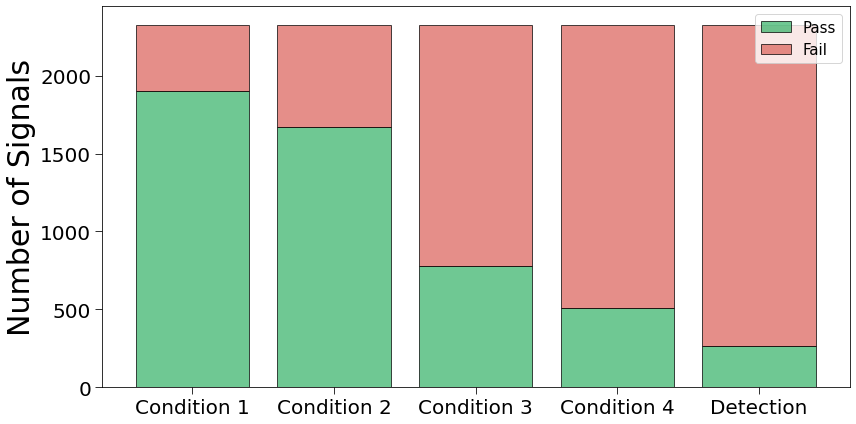

In [175]:
# Plotting
fig, ax = plt.subplots(figsize=(12, 6)) 

# Stacked bar plot
ax.bar(conditions, 
        pass_counts, 
        color=my_colours[3],
        edgecolor='black',
        alpha = alpha,
        label='Pass')

ax.bar(conditions, 
        fail_counts, 
        bottom=pass_counts, 
        color=detection_colours[0], 
        edgecolor='black',
        alpha = alpha,
        label='Fail')


#ax.set_xlabel('Conditions',fontsize = paper_axis_label_fs)
ax.set_ylabel('Number of Signals', fontsize = axis_label_font)

# plt.title('Pass/Fail Ratio for Each Condition', fontsize=paper_title_fs)

ax.tick_params(labelsize=20, which='major', length=7)
ax.tick_params(which='minor', length=4)
        

plt.legend(fontsize = 15)

plt.tight_layout()


## Sensitivity Map

In [180]:
period_thresholds = np.arange(0, 10.1, 1)
period_thresholds

# Loop through the periodthresholds
for threshold in period_thresholds:
    # Filter the dataset based on the period threshold
    period_mask = 10**df_Jupiter_1AU['Inj.1P log(P)'] >= threshold
    period_and_detection_mask = (10**df_Jupiter_1AU['Inj.1P log(P)'] >= threshold) & (df_Jupiter_1AU['Detection'] == 1)
    
    num_planets = period_mask.sum()
    num_detected = period_and_detection_mask.sum()
    
    # print('num_planets = ',num_planets, 'num_detected = ', num_detected )
    
    # Calculate the detection fraction
    detection_fraction = num_detected / num_planets if num_planets > 0 else np.nan
    
    # Print the results
    print(f"Detection fraction for planets with period >= {threshold:.0f} years: {detection_fraction:.2f}")

Detection fraction for planets with period >= 0 years: 0.11
Detection fraction for planets with period >= 1 years: 0.12
Detection fraction for planets with period >= 2 years: 0.14
Detection fraction for planets with period >= 3 years: 0.14
Detection fraction for planets with period >= 4 years: 0.13
Detection fraction for planets with period >= 5 years: 0.13
Detection fraction for planets with period >= 6 years: 0.11
Detection fraction for planets with period >= 7 years: 0.10
Detection fraction for planets with period >= 8 years: 0.12
Detection fraction for planets with period >= 9 years: 0.15
Detection fraction for planets with period >= 10 years: nan


In [181]:
period_thresholds = np.arange(0, 10.1, 1)
period_thresholds

# Loop through the periodthresholds
for threshold in period_thresholds:
    # Filter the dataset based on the period threshold
    period_mask = 10**df_Jupiter['Inj.1P log(P)'] >= threshold
    period_and_detection_mask = (10**df_Jupiter['Inj.1P log(P)'] >= threshold) & (df_Jupiter['Detection'] == 1)
    
    num_planets = period_mask.sum()
    num_detected = period_and_detection_mask.sum()
    
    # print('num_planets = ',num_planets, 'num_detected = ', num_detected )
    
    # Calculate the detection fraction
    detection_fraction = num_detected / num_planets if num_planets > 0 else np.nan
    
    # Print the results
    print(f"Detection fraction for planets with period >= {threshold:.1f} years: {detection_fraction:.2f}")

Detection fraction for planets with period >= 0.0 years: 0.05
Detection fraction for planets with period >= 1.0 years: 0.12
Detection fraction for planets with period >= 2.0 years: 0.14
Detection fraction for planets with period >= 3.0 years: 0.14
Detection fraction for planets with period >= 4.0 years: 0.13
Detection fraction for planets with period >= 5.0 years: 0.13
Detection fraction for planets with period >= 6.0 years: 0.12
Detection fraction for planets with period >= 7.0 years: 0.11
Detection fraction for planets with period >= 8.0 years: 0.12
Detection fraction for planets with period >= 9.0 years: 0.13
Detection fraction for planets with period >= 10.0 years: nan
